In [2]:
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import tensorflow as tf
import pickle
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D
from six.moves import cPickle 
import glob
from keras.datasets import cifar10

%matplotlib inline

c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
def normalize(x):
    return x / 255.0


if X_train.max() > 1:
    X_train = normalize(X_train)
    X_test = normalize(X_test)

In [5]:
nb_classes = np.unique(y_train).shape[0]
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]

In [6]:
img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)
input_shape = (32, 32, 3)

In [7]:
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)

Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (32, 32, 3)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [9]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_val = X_val.shape[0]
print("Number of training examples =", n_train)
print("Number of validation examples =", n_val)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)

Number of training examples = 37500
Number of validation examples = 12500
Number of testing examples = 10000
Image data shape = (32, 32, 3)


In [10]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [11]:
data_info = unpickle('C:\\Users\\Viktor\\Desktop\\Object_Recognition\\cifar-10-batches-py\\batches.meta')

In [12]:
print(data_info)

{b'num_cases_per_batch': 10000, b'num_vis': 3072, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']}


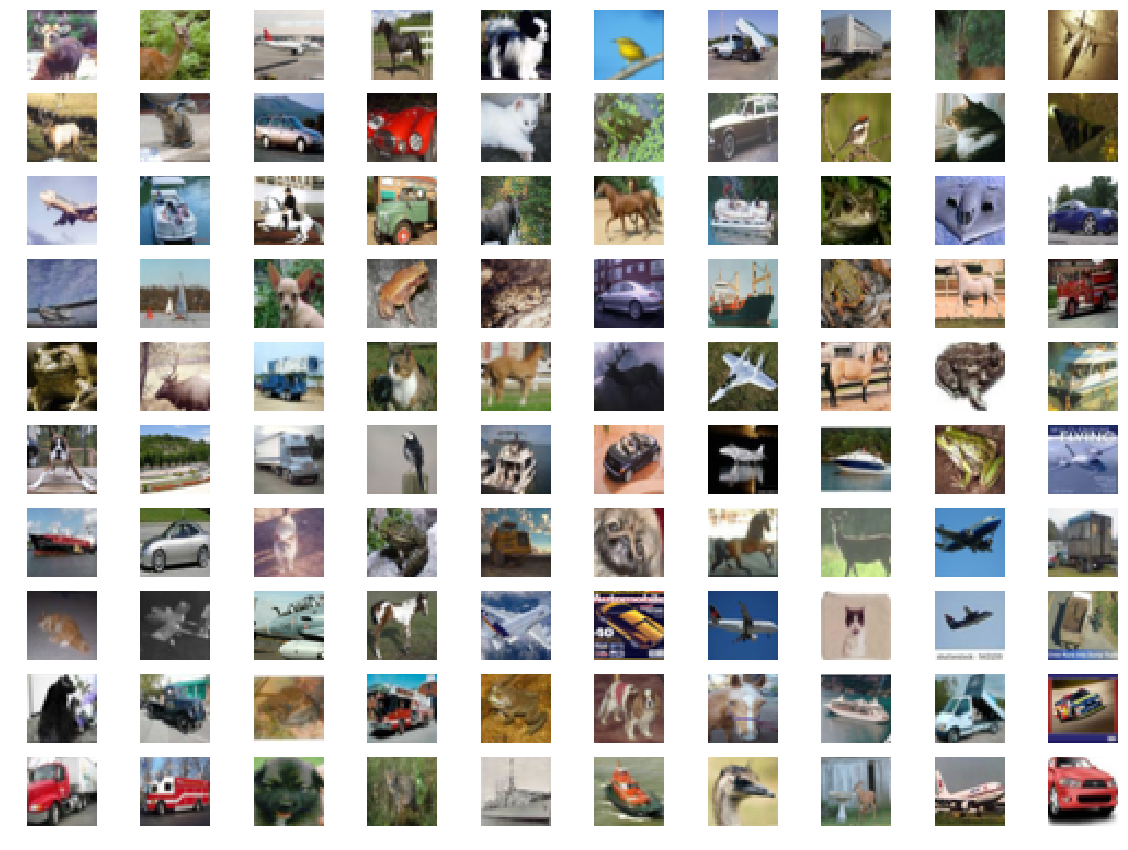

In [13]:
f = open('C:\\Users\\Viktor\\Desktop\\Object_Recognition\\cifar-10-batches-py\\data_batch_1', 'rb')
datadict = cPickle.load(f,encoding='latin1')
f.close()
X = datadict["data"] 
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(10,10,figsize=(20,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [22]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))
# model.add(Dropout(rate=0.5))
model.add(Activation('relu'))

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))
# model.add(Dropout(rate=0.5))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))
# model.add(Dropout(rate=0.5))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))
model.add(Dropout(rate=0.5))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, input_shape=(32*32*3,), activation='relu', name='hidden1'))
model.add(Dense(nb_classes, activation='softmax', name='output'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=32, epochs=10,
                    verbose=1, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  """
c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
  # This is added back by InteractiveShellApp.init_path()
c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`
c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 32)        0         
__________

In [23]:
files = glob.glob("C:/Users/Viktor/Desktop/Traffic_signs_classification/my_model/with_Keras/objects_from_net/*")

In [24]:
import os
from scipy import misc

def load_and_resize(f):
    image = misc.imread(f, mode="RGB")
    image = misc.imresize(image, (32,32))
    return image
    
images = np.array([load_and_resize(f) for f in files])
print(images.shape)

(10, 32, 32, 3)


c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
c:\users\viktor\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


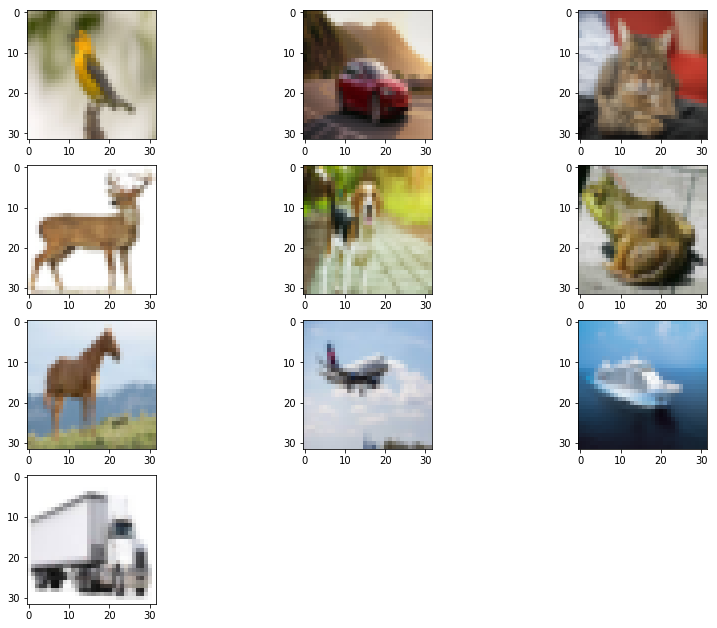

In [25]:
plt.figure(figsize=(14, 28))
for i in range(0, 10):
    plt.subplot(10, 3, i+1)
    plt.imshow(images[i, :, :, :])

In [26]:
objectnames = pd.read_csv("C:\\Users\\Viktor\\Desktop\\Traffic_signs_classification\\my_model\\with_Keras\\object_names.csv", index_col=["ClassId"])
objectnames

,ObjectName
ClassId,
0,airplane
1,automobile
2,bird
3,cat
4,deer
5,dog
6,frog
7,horse
8,ship


In [27]:
pred = model.predict(images, batch_size=32, verbose=0)
# print(pred)
print(np.argmax(pred, axis=1))

[2 1 0 4 5 6 2 0 8 9]


In [29]:
print("The model has correctly recognized 8 from 10 objects that makes 80% accuracy!!!!")

The model has correctly recognized 8 from 10 objects that makes 80% accuracy!!!!
